In [102]:
from google.colab import drive

In [103]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_excel("/content/gdrive/MyDrive/train.xlsx")

# Yeni Bölüm

In [139]:
df=df

In [140]:
df.head

<bound method NDFrame.head of             A1      A2      A3      A4    A5 A6    A7      A8  A9  A10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        A113  A114   

In [141]:
df.shape

(246008, 122)

In [164]:
df.info

<bound method DataFrame.info of             A1      A2      A3      A4    A5 A6    A7      A8  A9  A10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        A113  A114 

# Yeni Bölüm

In [143]:
df.dtypes

A1        int64
A2        int64
A3      float64
A4      float64
A5       object
         ...   
A118     object
A119    float64
A120    float64
A121      int64
A122      int64
Length: 122, dtype: object

In [144]:
df.isnull().sum()
#hangi kolonda kaç tane null değer var buna baktık

A1           0
A2           0
A3      143829
A4      163543
A5      124975
         ...  
A118         0
A119       811
A120    122297
A121         0
A122         0
Length: 122, dtype: int64

In [165]:
NaColumn = df.columns[df.isnull().mean()>=0.10]
df1= df.drop(NaColumn, axis=1)
#Eğer bir kolondaki değerlerin %10'tan fazlası null ise o kolonları datasetten çıkardık

In [166]:
df1.isnull().sum()
#bu işlemden sonra kolon sayımız 65'e düştü

A1        0
A2        0
A6        0
A7        0
A9        0
       ... 
A117      0
A118      0
A119    811
A121      0
A122      0
Length: 65, dtype: int64

In [167]:
column_cat = df1.select_dtypes(include='object').columns
print(column_cat)
#object kategorisi olan kolonları column_cat'a atadım

Index(['A6', 'A7', 'A17', 'A31', 'A32', 'A48', 'A68', 'A70', 'A94', 'A104',
       'A118'],
      dtype='object')


In [168]:
category_count = df1.nunique()
print (category_count)
#kategorik sütunlarımız kaç farklı kategori içeriyor buna baktık örnek olarak A1 sütunu datasetimzideki data sayısı kadar uniq değer içeriyor burayı ID olarak düşünebiliriz demektir.
#


A1      246008
A2       12104
A6           2
A7          51
A9           2
         ...  
A117         2
A118         6
A119        10
A121         2
A122         2
Length: 65, dtype: int64


In [169]:
object_columns = df1.select_dtypes(include=['object']).columns

for col in object_columns:
    unique_values = df1[col].value_counts()
    print(f"{col}---{len(unique_values)}")

###hangi object tipindedeki sütunda kaç tane kategori var buna baktık

A6---2
A7---51
A17---7
A31---8
A32---6
A48---2
A68---5
A70---3
A94---7
A104---2
A118---6


In [171]:
for column in df1.columns:

    unique_values = df1[column].unique()
    if len(unique_values) == 2:
        binary = {unique_values[0]: 0, unique_values[1]: 1}
        df1[column] = df[column].replace(binary)
  
###2 kategori içeren object tipindeki sütunlardaki kategorileri binary hale getirdik for döngüsü yardımıyla aşağıda da A1 ve A6 sütununu çalıştırarak kontrol ettik 
### 236977 ID'li kişinin A6 sütununda karşısında Y yazıyordu ve bunu 1'e çevirmiş yani for döngümüz çalışmış  
print(df1[['A1', 'A6']].head())

       A1  A6
0   69769   0
1  236977   1
2  168821   0
3   94708   0
4   84556   0


In [173]:
column_cat = df1.select_dtypes(include='object').columns
print(column_cat)
#bu işlemlerin ardından 8 kategorik datamız kaldı bunları elemeden önce satır bazında eğer kalan kolonlardan yarısı boş olan bir datamız varsa bu datayı setten çıkartalım

Index(['A7', 'A17', 'A31', 'A32', 'A68', 'A70', 'A94', 'A118'], dtype='object')


In [90]:
df1.columns[df1.isnull().sum() > 0]
#####burada geriye kalan ve NA data içeren kolonlarımıza baktık

Index(['A14', 'A17', 'A26', 'A28', 'A36', 'A41', 'A73', 'A86', 'A100', 'A119'], dtype='object')

In [174]:
df1[df1.columns[df1.isnull().sum() > 0]].dtypes
## burada ise geriye kalan ve NA data içeren kolonlarımızın içerdiği data tipine baktık ve biri hariç hepsi float tipinde 

A14     float64
A17      object
A26     float64
A28     float64
A36     float64
A41     float64
A73     float64
A86     float64
A100    float64
A119    float64
dtype: object

In [182]:
most_A17=df1['A17'].mode()[0]
df1['A17']= df1['A17'].fillna(most_A17)
df1[df1.columns[df1.isnull().sum() > 0]].dtypes
##Object tipinde olan ve NA data içeren A17 sütunundaki NA dataları o sütunda en çok yer alan kategori ile değiştirdik ve geriye sadece float tipinde data içeren NA datalarımız kaldı

A14     float64
A26     float64
A28     float64
A36     float64
A41     float64
A73     float64
A86     float64
A100    float64
A119    float64
dtype: object

In [186]:
df1.fillna(df1.median(), inplace=True)
#kalan bütün NA data tipleri float olduğu için nu kalan NA dataları bulunduğu sütunun medyanı ile değiştirdik

<ipython-input-186-b84f7990201a>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.fillna(df1.median(), inplace=True)


In [187]:
df1.isnull().sum()

A1      0
A2      0
A6      0
A7      0
A9      0
       ..
A117    0
A118    0
A119    0
A121    0
A122    0
Length: 65, dtype: int64

In [190]:
df1 = pd.get_dummies(df1, columns=column_cat)
df1.head


#pandas kütüphanesinde bulunan get_dummies fonksiyonu yardımıyla kategorik olan örnek veriyorum; bir kolonda pazartesi salı çarşamba diye
#değerler var bu kolondaki değerleri alıp üç yeni kolon yaratıyor pazartesi, salı ve çarşamba adı altında ve eğer o müşteri, yolcu her neyse
#eğer pazartesi gittiyse veya yolcuysa onun karşılık gelen hücrede 1 değilse sıfır yazıyor yani binary hale geliyor. aynısını salı ve çarşamba 
#günleri için yeni kolon yaratıp yapıyor
#bu işlemden sonra kolon sayımız 150 oldu 

<bound method NDFrame.head of             A1      A2  A6  A9  A10       A14  A16  A20  A21  A24  ...  \
0        69769    -946   0   0    2  180000.0    0    0    0    0  ...   
1       236977     -92   1   0    3  135000.0    0    0    0    0  ...   
2       168821   -1646   0   0    2  553500.0    0    0    1    0  ...   
3        94708   -1651   0   0    2  391500.0    0    0    1    0  ...   
4        84556    -977   0   0    2  225000.0    0    0    0    0  ...   
...        ...     ...  ..  ..  ...       ...  ...  ...  ...  ...  ...   
246003  248161    -595   0   0    2  405000.0    0    0    0    0  ...   
246004  257069   -4334   0   0    2  225000.0    0    0    0    0  ...   
246005  154350  365243   0   0    2  234000.0    0    0    0    0  ...   
246006  148183  365243   0   0    3  810000.0    0    0    1    0  ...   
246007    5167  365243   1   0    2  877500.0    0    0    1    0  ...   

        A94_SUNY  A94_THUY  A94_TUEY  A94_WEDY  A118_Cive  A118_Mard  \
0        

In [191]:
df1.dtypes
df1.isnull().sum()


A1           0
A2           0
A6           0
A9           0
A10          0
            ..
A118_Mard    0
A118_Sepd    0
A118_Sind    0
A118_Unkn    0
A118_Widw    0
Length: 150, dtype: int64

In [192]:
df1.dtypes

A1           int64
A2           int64
A6           int64
A9           int64
A10          int64
             ...  
A118_Mard    uint8
A118_Sepd    uint8
A118_Sind    uint8
A118_Unkn    uint8
A118_Widw    uint8
Length: 150, dtype: object

In [193]:
num_missing = df1.isnull().sum()

num_cols_with_missing = (num_missing > 0).sum()

print("Number of columns with missing values:", num_cols_with_missing)

#### NA data içeren sütun sayımıza baktık ve sıfır geldi

Number of columns with missing values: 0


In [194]:
corr_matrix=df1.corr()

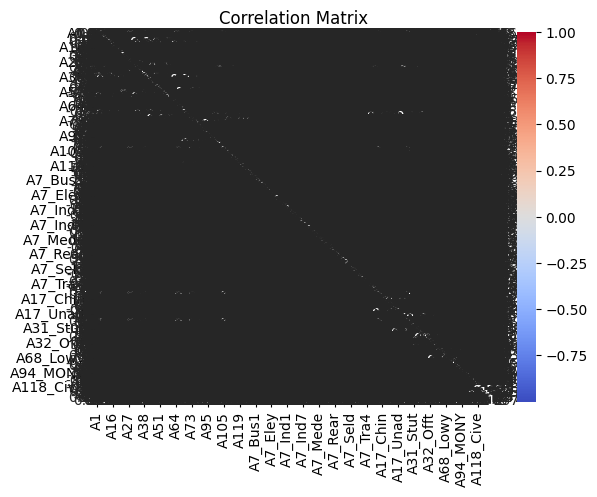

In [195]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()
### Çok sütun olduğu için doğal olarak düzhün bir map çıkmadı

In [196]:
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
columns_to_drop = [col for col in high_corr.columns if any(high_corr[col] > 0.9)]
df1 = df1.drop(columns=columns_to_drop)

#korelasyonu 0.9'dan fazla olan kolonlardan birini datasetten çıkardım

In [197]:
df1.shape
### son olarak 246008 satır 166 sütunlu bir dataset oldu

(246008, 144)